<a href="https://colab.research.google.com/github/shiktr1785/isss-ai-python/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: Metaheuristics for Traveling Salesman Problem
### Shikhar Mani Tripathi




In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_cities(n_cities, range_min=0, range_max=100):

  # Generate random city coordinates within a given range.
  return np.random.uniform(range_min, range_max, size=(n_cities, 2))

In [3]:
def compute_distance_matrix(cities):

  # Compute the euclidian distance between the cities.

  n = len(cities)
  distance_matrix = np.zeros((n, n))

  for i in range(n):
    for j in range(n):
      distance_matrix[i,j] = np.linalg.norm(cities[i] - cities[j])
  return distance_matrix

In [4]:
def evaluate_tour_cost(tour, distance_matrix):

  # Calculate the total cost for the distance of the tour.
  cost = 0

  for i in range(len(tour)):
    cost += distance_matrix[tour[i], tour[(i+1) % len(tour)]]
  return cost

In [7]:
def plot_cities_and_tour(cities, tour):

  # Visualise cities and optional tour path

  plt.figure(figsize=(10,6))
  plt.scatter(cities[:, 0], cities[:, 1], color='blue', label='Cities')

  # Add labels to cities
  for i, (x, y) in enumerate(cities):
      plt.text(x, y, str(i), fontsize=12, color='red', ha='right', va='bottom')

  # If a tour is provided, plot the path
  if tour is not None:
    for i in range(len(tour) - 1):
      plt.plot([cities[tour[i], 0], cities[tour[i+1], 0]],
              [cities[tour[i], 1], cities[tour[i+1], 1]],
              color='red', linestyle='-', linewidth=2)

      # Add return to starting city

      plt.plot([cities[tour[-1]][0], cities[tour[0]][0]],
              [cities[tour[-1]][1], cities[tour[0]][1]],
              color='orange', linestyle='-', linewidth=2)

  plt.legend()
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("TSP Cities and Optional Tour")
  plt.grid()
  plt.show()

Cities:
 [[93.30373887 59.21628311]
 [99.09940925 39.3108384 ]
 [ 1.13262732 57.77454664]
 [98.29150603 46.8337793 ]
 [23.66631498 68.73547807]
 [46.58545885 69.22062991]
 [49.64863537 58.730513  ]
 [50.71473836 83.17743028]
 [68.79154239 26.60574906]
 [62.43005795 17.35872437]]

Distance Matrix:
 [[ 0.         20.73201688 92.18238666 13.34931541 70.28503311 47.7774491
  43.65780612 48.86675289 40.79576825 52.01191591]
 [20.73201688  0.         99.69151861  7.56619768 80.96888989 60.43434962
  53.12723218 65.30967968 32.86314179 42.73799989]
 [92.18238666 99.69151861  0.         97.77294157 25.0581144  46.87187554
  48.52542538 55.71079099 74.49310527 73.42216077]
 [13.34931541  7.56619768 97.77294157  0.         77.77276868 56.34435548
  50.07655279 59.86994061 35.76899582 46.42006378]
 [70.28503311 80.96888989 25.0581144  77.77276868  0.         22.92427814
  27.84205988 30.66247203 61.73491893 64.35991446]
 [47.7774491  60.43434962 46.87187554 56.34435548 22.92427814  0.
  10.928202

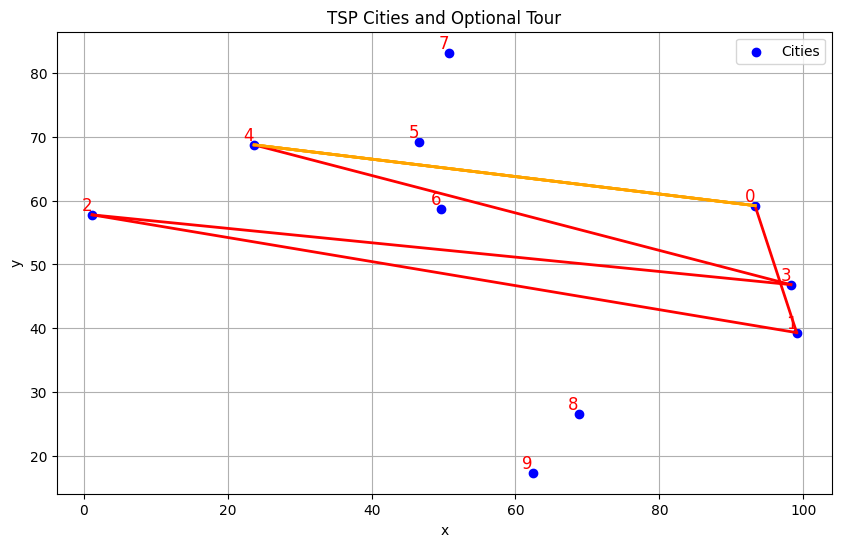

In [12]:
if __name__ == "__main__":

  # Generate Cities
  cities = generate_cities(10)
  print("Cities:\n", cities)

  # Compute distance matrix
  distance_matrix = compute_distance_matrix(cities)
  print("\nDistance Matrix:\n", distance_matrix)

  tour = [0, 1, 2, 3, 4]
  cost = evaluate_tour_cost(tour, distance_matrix)
  print("\nTour Cost:", cost)

  plot_cities_and_tour(cities, tour)